In [325]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np

plt.rcParams['font.family'] = 'SimSun'

In [326]:
table_2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')
table_3 = pd.read_excel('../data/表3-患者影像信息血肿及水肿的形状及灰度分布.xlsx')


# 创建一个空的 DataFrame df3，用于存储匹配的数据
df3 = pd.DataFrame(columns=table_3.columns)

# 遍历table_3的流水号
for y_value in table_3['流水号']:
    # 检查Y值是否在table_2的随访1流水号
    if y_value in table_2['随访1流水号'].values:
        # 如果匹配，将对应的行添加到df3
        matching_rows = table_3[table_3['流水号'] == y_value]
        df3 = pd.concat([df3, matching_rows])

# 重置df3的索引
df3.reset_index(drop=True, inplace=True)



# 将df3添加到table_2的列的末尾
table_2 = pd.concat([table_2, df3], axis=1)
table_2.to_excel('./figs/Q3/Q3_b.xlsx',index=False)
table_2

,ID,首次检查流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,sub001,20161212002136,69714,0.000258,0.877112,0.120148,0.000000,0.0,0.000000,0.000000,...,7.011415,63.060397,63.564973,25.287045,70.502845,4.876413,63.676979,-0.196186,0.141840,78.143978
1,sub002,20160406002131,47500,0.496000,0.180779,0.302316,0.000000,0.0,0.003032,0.000000,...,8.449136,43.374198,44.443113,11.616710,56.952001,6.143976,44.582715,-0.391579,0.097049,106.297405
2,sub003,20160413000006,86396,0.053718,0.829078,0.099681,0.000197,0.0,0.000000,0.000000,...,6.442121,50.643750,50.873423,3.900471,74.206274,4.432359,51.300728,-0.274237,0.161879,66.975306
3,sub004,20161215001667,45498,0.002242,0.002198,0.029100,0.000374,0.0,0.163458,0.313618,...,9.683710,61.540683,61.796755,13.728895,107.135201,6.693862,62.755762,-0.055021,0.154618,151.030053
4,sub005,20161222000978,14832,0.000000,0.000000,0.001146,0.000337,0.0,0.000202,0.413363,...,6.283644,37.033290,37.355282,5.032169,64.718583,4.347808,37.877098,-0.166289,0.144498,63.209930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,20200306000927,32559,0.000000,0.033754,0.000000,0.000000,0.0,0.038545,0.922049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,20201009003102,18150,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.997410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,20200410001952,27969,0.002682,0.937359,0.059959,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,20200218000582,53154,0.000000,0.000000,0.000000,0.000000,0.0,0.004572,0.857678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
table_1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table_2
Q3_b_full_table = pd.merge(table_1, table_2, on='ID')
Q3_b_full_table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,7.011415,63.060397,63.564973,25.287045,70.502845,4.876413,63.676979,-0.196186,0.141840,78.143978
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,8.449136,43.374198,44.443113,11.616710,56.952001,6.143976,44.582715,-0.391579,0.097049,106.297405
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,6.442121,50.643750,50.873423,3.900471,74.206274,4.432359,51.300728,-0.274237,0.161879,66.975306
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,9.683710,61.540683,61.796755,13.728895,107.135201,6.693862,62.755762,-0.055021,0.154618,151.030053
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,6.283644,37.033290,37.355282,5.032169,64.718583,4.347808,37.877098,-0.166289,0.144498,63.209930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
table_wj = pd.read_excel('../data/lwj/2c.xlsx')
Q3_b_full_table = pd.merge(Q3_b_full_table, table_wj, on='ID')
Q3_b_full_table

,ID,90天mRS,数据集划分,入院首次影像检查流水号_x,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,NCCT_original_firstorder_MeanAbsoluteDeviation_y,NCCT_original_firstorder_Mean_y,NCCT_original_firstorder_Median_y,NCCT_original_firstorder_Minimum_y,NCCT_original_firstorder_Range_y,NCCT_original_firstorder_RobustMeanAbsoluteDeviation_y,NCCT_original_firstorder_RootMeanSquared_y,NCCT_original_firstorder_Skewness_y,NCCT_original_firstorder_Uniformity_y,NCCT_original_firstorder_Variance_y
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,4.0,训练,20180802001789,93,女,0,0,0,0,...,7.118580,44.469975,45.627698,-1.353307,75.353316,4.764270,45.427431,-0.852965,0.155848,86.072788
96,sub097,2.0,训练,20181010000767,83,女,0,1,0,0,...,8.006967,49.624525,49.646822,10.589739,69.684072,5.654763,50.616489,-0.047266,0.121547,99.435503
97,sub098,5.0,训练,20180612002507,82,男,0,1,1,1,...,8.462658,35.911280,35.494566,-2.467873,98.855412,5.523299,37.597608,0.432499,0.166861,123.960058
98,sub099,3.0,训练,20180620002296,53,男,0,1,0,0,...,6.006107,41.019959,41.559362,3.177012,66.837891,4.002934,41.752598,-0.318306,0.159415,60.642372


In [331]:
Q3_b_full_table.to_excel('./figs/Q3/Q3_b_all.xlsx',index=False)
Q3_b_full_table

,ID,90天mRS,数据集划分,入院首次影像检查流水号_x,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,NCCT_original_firstorder_MeanAbsoluteDeviation_y,NCCT_original_firstorder_Mean_y,NCCT_original_firstorder_Median_y,NCCT_original_firstorder_Minimum_y,NCCT_original_firstorder_Range_y,NCCT_original_firstorder_RobustMeanAbsoluteDeviation_y,NCCT_original_firstorder_RootMeanSquared_y,NCCT_original_firstorder_Skewness_y,NCCT_original_firstorder_Uniformity_y,NCCT_original_firstorder_Variance_y
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,4.0,训练,20180802001789,93,女,0,0,0,0,...,7.118580,44.469975,45.627698,-1.353307,75.353316,4.764270,45.427431,-0.852965,0.155848,86.072788
96,sub097,2.0,训练,20181010000767,83,女,0,1,0,0,...,8.006967,49.624525,49.646822,10.589739,69.684072,5.654763,50.616489,-0.047266,0.121547,99.435503
97,sub098,5.0,训练,20180612002507,82,男,0,1,1,1,...,8.462658,35.911280,35.494566,-2.467873,98.855412,5.523299,37.597608,0.432499,0.166861,123.960058
98,sub099,3.0,训练,20180620002296,53,男,0,1,0,0,...,6.006107,41.019959,41.559362,3.177012,66.837891,4.002934,41.752598,-0.318306,0.159415,60.642372


In [341]:
# 获取后96列的列名
shape_features = Q3_b_full_table.columns[-96:].tolist()

# 打印提取的列名
print(shape_features)

temp_fea = [ 'original_shape_Elongation_x', 'original_shape_Flatness_x', 'original_shape_LeastAxisLength_x', 'original_shape_MajorAxisLength_x', 'original_shape_Maximum2DDiameterColumn_x', 'original_shape_Maximum2DDiameterRow_x', 'original_shape_Maximum2DDiameterSlice_x', 'original_shape_Maximum3DDiameter_x', 'original_shape_MeshVolume_x', 'original_shape_MinorAxisLength_x', 'original_shape_Sphericity_x', 'original_shape_SurfaceArea_x', 'original_shape_SurfaceVolumeRatio_x', 'original_shape_VoxelVolume_x', 'NCCT_original_firstorder_10Percentile_x', 'NCCT_original_firstorder_90Percentile_x', 'NCCT_original_firstorder_Energy_x', 'NCCT_original_firstorder_Entropy_x', 'NCCT_original_firstorder_InterquartileRange_x', 'NCCT_original_firstorder_Kurtosis_x', 'NCCT_original_firstorder_Maximum_x', 'NCCT_original_firstorder_MeanAbsoluteDeviation_x', 'NCCT_original_firstorder_Mean_x', 'NCCT_original_firstorder_Median_x', 'NCCT_original_firstorder_Minimum_x', 'NCCT_original_firstorder_Range_x', 'NCCT_original_firstorder_RobustMeanAbsoluteDeviation_x', 'NCCT_original_firstorder_RootMeanSquared_x', 'NCCT_original_firstorder_Skewness_x', 'NCCT_original_firstorder_Uniformity_x', 'NCCT_original_firstorder_Variance_x', 'original_shape_Elongation_y', 'original_shape_Flatness_y', 'original_shape_LeastAxisLength_y', 'original_shape_MajorAxisLength_y', 'original_shape_Maximum2DDiameterColumn_y', 'original_shape_Maximum2DDiameterRow_y', 'original_shape_Maximum2DDiameterSlice_y', 'original_shape_Maximum3DDiameter_y', 'original_shape_MeshVolume_y', 'original_shape_MinorAxisLength_y', 'original_shape_Sphericity_y', 'original_shape_SurfaceArea_y', 'original_shape_SurfaceVolumeRatio_y', 'original_shape_VoxelVolume_y', 'NCCT_original_firstorder_10Percentile_y', 'NCCT_original_firstorder_90Percentile_y', 'NCCT_original_firstorder_Energy_y', 'NCCT_original_firstorder_Entropy_y', 'NCCT_original_firstorder_InterquartileRange_y', 'NCCT_original_firstorder_Kurtosis_y', 'NCCT_original_firstorder_Maximum_y', 'NCCT_original_firstorder_MeanAbsoluteDeviation_y', 'NCCT_original_firstorder_Mean_y', 'NCCT_original_firstorder_Median_y', 'NCCT_original_firstorder_Minimum_y', 'NCCT_original_firstorder_Range_y', 'NCCT_original_firstorder_RobustMeanAbsoluteDeviation_y', 'NCCT_original_firstorder_RootMeanSquared_y', 'NCCT_original_firstorder_Skewness_y', 'NCCT_original_firstorder_Uniformity_y', 'NCCT_original_firstorder_Variance_y']

['ED_PCA_R_Ratio.7', 'ED_Pons_Medulla_R_Ratio.7', 'ED_Cerebellum_R_Ratio.7', 'ED_ACA_L_Ratio.7', 'ED_MCA_L_Ratio.7', 'ED_PCA_L_Ratio.7', 'ED_Pons_Medulla_L_Ratio.7', 'ED_Cerebellum_L_Ratio.7', '随访8流水号', 'HM_volume.8', 'HM_ACA_R_Ratio.8', 'HM_MCA_R_Ratio.8', 'HM_PCA_R_Ratio.8', 'HM_Pons_Medulla_R_Ratio.8', 'HM_Cerebellum_R_Ratio.8', 'HM_ACA_L_Ratio.8', 'HM_MCA_L_Ratio.8', 'HM_PCA_L_Ratio.8', 'HM_Pons_Medulla_L_Ratio.8', 'HM_Cerebellum_L_Ratio.8', 'ED_volume.8', 'ED_ACA_R_Ratio.8', 'ED_MCA_R_Ratio.8', 'ED_PCA_R_Ratio.8', 'ED_Pons_Medulla_R_Ratio.8', 'ED_Cerebellum_R_Ratio.8', 'ED_ACA_L_Ratio.8', 'ED_MCA_L_Ratio.8', 'ED_PCA_L_Ratio.8', 'ED_Pons_Medulla_L_Ratio.8', 'ED_Cerebellum_L_Ratio.8', '备注', '流水号', 'original_shape_Elongation_x', 'original_shape_Flatness_x', 'original_shape_LeastAxisLength_x', 'original_shape_MajorAxisLength_x', 'original_shape_Maximum2DDiameterColumn_x', 'original_shape_Maximum2DDiameterRow_x', 'original_shape_Maximum2DDiameterSlice_x', 'original_shape_Maximum3DDiame

In [342]:
_90mRs = Q3_b_full_table['90天mRS']  #Y
features = ['年龄', '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', 'HM_volume', 'ED_volume', 'HM_ACA_R_Ratio',
            'HM_MCA_R_Ratio', 'HM_PCA_R_Ratio', 'HM_Pons_Medulla_R_Ratio', 'HM_Cerebellum_R_Ratio', 'HM_ACA_L_Ratio',
            'HM_MCA_L_Ratio', 'HM_PCA_L_Ratio', 'HM_Pons_Medulla_L_Ratio', 'HM_Cerebellum_L_Ratio', 'ED_ACA_R_Ratio',
            'ED_MCA_R_Ratio', 'ED_PCA_R_Ratio', 'ED_Pons_Medulla_R_Ratio', 'ED_Cerebellum_R_Ratio', 'ED_ACA_L_Ratio',
            'ED_MCA_L_Ratio', 'ED_PCA_L_Ratio', 'ED_Pons_Medulla_L_Ratio', 'ED_Cerebellum_L_Ratio']
fea = ['90天mRS']
features = features + temp_fea + fea

In [343]:
print(features)

['年龄', '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', 'HM_volume', 'ED_volume', 'HM_ACA_R_Ratio', 'HM_MCA_R_Ratio', 'HM_PCA_R_Ratio', 'HM_Pons_Medulla_R_Ratio', 'HM_Cerebellum_R_Ratio', 'HM_ACA_L_Ratio', 'HM_MCA_L_Ratio', 'HM_PCA_L_Ratio', 'HM_Pons_Medulla_L_Ratio', 'HM_Cerebellum_L_Ratio', 'ED_ACA_R_Ratio', 'ED_MCA_R_Ratio', 'ED_PCA_R_Ratio', 'ED_Pons_Medulla_R_Ratio', 'ED_Cerebellum_R_Ratio', 'ED_ACA_L_Ratio', 'ED_MCA_L_Ratio', 'ED_PCA_L_Ratio', 'ED_Pons_Medulla_L_Ratio', 'ED_Cerebellum_L_Ratio', 'original_shape_Elongation_x', 'original_shape_Flatness_x', 'original_shape_LeastAxisLength_x', 'original_shape_MajorAxisLength_x', 'original_shape_Maximum2DDiameterColumn_x', 'original_shape_Maximum2DDiameterRow_x', 'original_shape_Maximum2DDiameterSlice_x', 'original_shape_Maximum3DDiameter_x', 'original_shape_MeshVolume_x', 'original_shape_MinorAxisLength_x', 'original_shape_Sphericity_x', 'original_shape_SurfaceArea_x', 'original_shape_SurfaceVolumeRatio_x', 'original_shape_VoxelV

In [344]:
table = Q3_b_full_table[features]

# table.to_excel('./excels/Q3_a_X.xlsx',index=False)
table

,年龄,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,HM_volume,ED_volume,...,NCCT_original_firstorder_Mean_y,NCCT_original_firstorder_Median_y,NCCT_original_firstorder_Minimum_y,NCCT_original_firstorder_Range_y,NCCT_original_firstorder_RobustMeanAbsoluteDeviation_y,NCCT_original_firstorder_RootMeanSquared_y,NCCT_original_firstorder_Skewness_y,NCCT_original_firstorder_Uniformity_y,NCCT_original_firstorder_Variance_y,90天mRS
0,43,0,0,0,0,0,0,0,69714,48919,...,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179,4.0
1,58,1,0,0,0,0,0,0,47500,23526,...,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248,0.0
2,78,1,0,0,0,0,0,0,86396,32621,...,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851,5.0
3,70,1,1,0,0,0,0,0,45498,22191,...,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157,4.0
4,51,0,0,0,0,0,0,0,14832,47392,...,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,0,0,0,0,0,0,0,9114,5951,...,44.469975,45.627698,-1.353307,75.353316,4.764270,45.427431,-0.852965,0.155848,86.072788,4.0
96,83,1,0,0,0,0,0,0,10806,10227,...,49.624525,49.646822,10.589739,69.684072,5.654763,50.616489,-0.047266,0.121547,99.435503,2.0
97,82,1,1,1,1,1,1,0,188134,39868,...,35.911280,35.494566,-2.467873,98.855412,5.523299,37.597608,0.432499,0.166861,123.960058,5.0
98,53,1,0,0,0,0,0,0,37309,9653,...,41.019959,41.559362,3.177012,66.837891,4.002934,41.752598,-0.318306,0.159415,60.642372,3.0


D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\wwx\AppData\Local\Temp\ipykernel_46672\3147437876.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/Q3/Q3_b_cor.png',dmi=400)
C:\Users\wwx\AppData\Local\Temp\ipykernel_46672\3147437876.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('./figs/Q3/Q3_b_cor.png',dmi=400)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


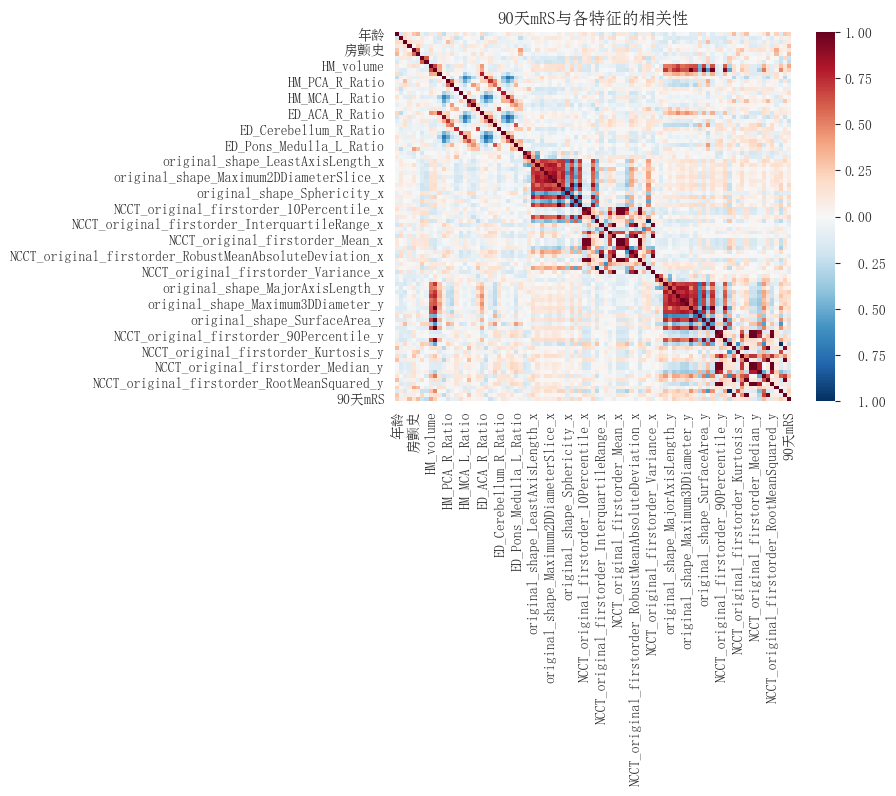

In [345]:
corr_matrix = table.corr() # 默认使用皮尔逊相关系数
corr_matrix['90天mRS']
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1) # 使用红蓝色调，设置最小值和最大值为-1和1
plt.title('90天mRS与各特征的相关性')
plt.savefig('./figs/Q3/Q3_b_cor.png',dmi=400)
plt.show() # 显示图像


In [346]:
for feature, corr in corr_matrix['90天mRS'].items(): # 遍历相关系数矩阵的每一列
        print(feature, corr) # 打印出特征和对应相关性值


年龄 0.23356131134009436
高血压病史 0.09008864238635042
卒中病史 0.0676476084218266
糖尿病史 0.31332834082139754
房颤史 0.1556198346206145
冠心病史 0.3131265691541534
吸烟史 -0.2053696452985496
饮酒史 -0.2548849394345527
HM_volume 0.385256804156474
ED_volume 0.24099673305463595
HM_ACA_R_Ratio -0.030975511139461138
HM_MCA_R_Ratio -0.030646622170889645
HM_PCA_R_Ratio -0.17477727298421933
HM_Pons_Medulla_R_Ratio -0.07793250380890893
HM_Cerebellum_R_Ratio -0.092279734599636
HM_ACA_L_Ratio 0.1784359356728696
HM_MCA_L_Ratio 0.04505554740058538
HM_PCA_L_Ratio 0.06756454634800081
HM_Pons_Medulla_L_Ratio 0.012260399914876671
HM_Cerebellum_L_Ratio 0.0315886563828695
ED_ACA_R_Ratio 0.04781112002070967
ED_MCA_R_Ratio -0.02846806664369994
ED_PCA_R_Ratio -0.21496145604612807
ED_Pons_Medulla_R_Ratio -0.11202394727726943
ED_Cerebellum_R_Ratio 0.022097033675488088
ED_ACA_L_Ratio 0.12505619739314322
ED_MCA_L_Ratio 0.06257572236642961
ED_PCA_L_Ratio 0.02679048591284309
ED_Pons_Medulla_L_Ratio -0.01589030862551477
ED_Cerebellum_L_Ra

In [347]:
# 创建相关性阈值
threshold = 0.2

# 找出与ED_volume正相关和负相关绝对值大于0.65的特征
positive_corr_mRS = corr_matrix['90天mRS'][(corr_matrix['90天mRS'] > threshold) | (corr_matrix['90天mRS'] < -threshold)]


# 输出结果
print("与mRS正相关和负相关绝对值大于0.2的特征:")
print(len(positive_corr_mRS))

与mRS正相关和负相关绝对值大于0.2的特征:
22


In [348]:
positive_corr_mRS_fea = np.array(positive_corr_mRS.index)
print(positive_corr_mRS_fea)

['年龄' '糖尿病史' '冠心病史' '吸烟史' '饮酒史' 'HM_volume' 'ED_volume' 'ED_PCA_R_Ratio'
 'original_shape_MeshVolume_x' 'original_shape_SurfaceArea_x'
 'original_shape_VoxelVolume_x' 'NCCT_original_firstorder_Energy_x'
 'original_shape_Maximum2DDiameterColumn_y' 'original_shape_MeshVolume_y'
 'original_shape_SurfaceArea_y' 'original_shape_SurfaceVolumeRatio_y'
 'original_shape_VoxelVolume_y' 'NCCT_original_firstorder_Entropy_y'
 'NCCT_original_firstorder_Minimum_y' 'NCCT_original_firstorder_Range_y'
 'NCCT_original_firstorder_Uniformity_y' '90天mRS']


In [350]:
features_need = ['年龄', '糖尿病史', '冠心病史', '吸烟史', '饮酒史', 'HM_volume', 'ED_volume', 'ED_PCA_R_Ratio',
 'original_shape_MeshVolume_x', 'original_shape_SurfaceArea_x',
 'original_shape_VoxelVolume_x', 'NCCT_original_firstorder_Energy_x',
 'original_shape_Maximum2DDiameterColumn_y', 'original_shape_MeshVolume_y',
 'original_shape_SurfaceArea_y', 'original_shape_SurfaceVolumeRatio_y',
 'original_shape_VoxelVolume_y', 'NCCT_original_firstorder_Entropy_y',
 'NCCT_original_firstorder_Minimum_y', 'NCCT_original_firstorder_Range_y',
 'NCCT_original_firstorder_Uniformity_y' ]
input_fea = Q3_b_full_table[features_need]
input_fea

,年龄,糖尿病史,冠心病史,吸烟史,饮酒史,HM_volume,ED_volume,ED_PCA_R_Ratio,original_shape_MeshVolume_x,original_shape_SurfaceArea_x,...,NCCT_original_firstorder_Energy_x,original_shape_Maximum2DDiameterColumn_y,original_shape_MeshVolume_y,original_shape_SurfaceArea_y,original_shape_SurfaceVolumeRatio_y,original_shape_VoxelVolume_y,NCCT_original_firstorder_Entropy_y,NCCT_original_firstorder_Minimum_y,NCCT_original_firstorder_Range_y,NCCT_original_firstorder_Uniformity_y
0,43,0,0,0,0,69714,48919,0.136511,5004.291667,5024.178633,...,2.104014e+07,60.016664,16795.208333,12328.452469,0.734046,17136,2.971570,2.630186,88.333203,0.156607
1,58,0,0,0,0,47500,23526,0.246876,1319.666667,1156.675772,...,2.695211e+06,57.982756,9128.250000,7213.155855,0.790201,9347,3.156185,11.670399,54.126259,0.132046
2,78,0,0,0,0,86396,32621,0.075013,6160.750000,6623.452958,...,1.694330e+07,69.115845,11952.375000,10296.788172,0.861485,12241,3.183489,-1.715890,70.139106,0.128060
3,70,0,0,0,0,45498,22191,0.012483,18025.833333,14736.542143,...,7.283859e+07,48.373546,8590.833333,6706.913313,0.780706,8789,3.013699,-20.991359,92.048538,0.145292
4,51,0,0,0,0,14832,47392,0.011690,9124.083333,6820.678698,...,1.338121e+07,102.883429,21773.833333,16362.521151,0.751476,22302,2.995498,-9.889141,96.821808,0.146488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,0,0,0,0,9114,5951,0.000000,19504.583333,14155.679264,...,4.976641e+07,36.055513,1718.875000,2018.321313,1.174211,1830,2.961653,-1.353307,75.353316,0.155848
96,83,0,0,0,0,10806,10227,0.163978,1067.041667,1741.075028,...,3.752074e+06,34.713110,3044.875000,2782.714802,0.913901,3122,3.254812,10.589739,69.684072,0.121547
97,82,1,1,1,0,188134,39868,0.177611,18510.583333,11937.133603,...,2.697501e+07,77.698134,14108.000000,12665.452494,0.897750,14498,2.883844,-2.467873,98.855412,0.166861
98,53,0,0,0,0,37309,9653,0.038019,704.125000,1432.562670,...,1.609723e+06,46.065171,2822.083333,3688.165052,1.306894,3008,2.942184,3.177012,66.837891,0.159415


In [351]:
X = pd.get_dummies(input_fea)
X

,年龄,糖尿病史,冠心病史,吸烟史,饮酒史,HM_volume,ED_volume,ED_PCA_R_Ratio,original_shape_MeshVolume_x,original_shape_SurfaceArea_x,...,original_shape_VoxelVolume_x_19764,original_shape_VoxelVolume_x_20386,original_shape_VoxelVolume_x_20749,original_shape_VoxelVolume_x_21571,original_shape_VoxelVolume_x_21676,original_shape_VoxelVolume_x_24106,original_shape_VoxelVolume_x_24211,original_shape_VoxelVolume_x_27884,original_shape_VoxelVolume_x_29352,original_shape_VoxelVolume_x_39907
0,43,0,0,0,0,69714,48919,0.136511,5004.291667,5024.178633,...,False,False,False,False,False,False,False,False,False,False
1,58,0,0,0,0,47500,23526,0.246876,1319.666667,1156.675772,...,False,False,False,False,False,False,False,False,False,False
2,78,0,0,0,0,86396,32621,0.075013,6160.750000,6623.452958,...,False,False,False,False,False,False,False,False,False,False
3,70,0,0,0,0,45498,22191,0.012483,18025.833333,14736.542143,...,False,False,False,False,False,False,False,False,False,False
4,51,0,0,0,0,14832,47392,0.011690,9124.083333,6820.678698,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,0,0,0,0,9114,5951,0.000000,19504.583333,14155.679264,...,True,False,False,False,False,False,False,False,False,False
96,83,0,0,0,0,10806,10227,0.163978,1067.041667,1741.075028,...,False,False,False,False,False,False,False,False,False,False
97,82,1,1,1,0,188134,39868,0.177611,18510.583333,11937.133603,...,False,False,False,False,False,False,False,False,False,False
98,53,0,0,0,0,37309,9653,0.038019,704.125000,1432.562670,...,False,False,False,False,False,False,False,False,False,False


In [352]:
y = Q3_b_full_table['90天mRS']
y

0     4.0
1     0.0
2     5.0
3     4.0
4     3.0
     ... 
95    4.0
96    2.0
97    5.0
98    3.0
99    2.0
Name: 90天mRS, Length: 100, dtype: float64

In [353]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.6, test_size=0.4, random_state=42)

In [354]:
X = pd.get_dummies(input_fea)
y = Q3_b_full_table['90天mRS']
print(y)

0     4.0
1     0.0
2     5.0
3     4.0
4     3.0
     ... 
95    4.0
96    2.0
97    5.0
98    3.0
99    2.0
Name: 90天mRS, Length: 100, dtype: float64


In [363]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop,Adam,SGD
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.regularizers import l2 # 导入l2正则化的类

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# 将标签进行独热编码
y_train_encoded = to_categorical(y_train)
y_valid_encoded = to_categorical(y_valid)


model = Sequential()

model.add(Dense(48, input_dim=X_train_scaled.shape[1], activation='ELU', kernel_regularizer=l2(0.01))) # 在第一个全连接层中添加l2正则化，参数为0.01
model.add(Dropout(0.1)) # 添加一个dropout层，dropout率为0.6
model.add(Dense(48, activation='ELU', kernel_regularizer=l2(0.01))) # 在第二个全连接层中添加l2正则化，参数为0.01
model.add(Dense(7, activation='softmax'))


# 编译模型
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])  # 使用交叉熵损失函数

# 训练模型
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid_encoded), verbose=1)
# 计算训练集的精度
train_accuracy = model.evaluate(X_train_scaled, y_train_encoded, verbose=0)[1]
print(f'Training Accuracy: {train_accuracy:.2f}')

# 计算验证集的精度
valid_accuracy = model.evaluate(X_valid_scaled, y_valid_encoded, verbose=0)[1]
print(f'Validation Accuracy: {valid_accuracy:.2f}')

# 计算预测集的精度
test_accuracy = model.evaluate(X_scaled, to_categorical(y, num_classes=7), verbose=0)[1]
print(f'Test Accuracy: {test_accuracy:.2f}')

# 预测每个类别的概率分布
probabilities = model.predict(X_scaled)

# 输出类别标签
predictions_nn = np.argmax(probabilities, axis=1)
print(predictions_nn.tolist())


Epoch 1/50
2/2 [==============================] - 0s 120ms/step - loss: 3.5340 - accuracy: 0.1500 - val_loss: 3.4430 - val_accuracy: 0.1500
Epoch 2/50
2/2 [==============================] - 0s 24ms/step - loss: 3.4785 - accuracy: 0.2000 - val_loss: 3.4326 - val_accuracy: 0.1500
Epoch 3/50
2/2 [==============================] - 0s 24ms/step - loss: 3.4649 - accuracy: 0.1667 - val_loss: 3.4244 - val_accuracy: 0.1500
Epoch 4/50
2/2 [==============================] - 0s 24ms/step - loss: 3.4072 - accuracy: 0.1833 - val_loss: 3.4173 - val_accuracy: 0.1250
Epoch 5/50
2/2 [==============================] - 0s 20ms/step - loss: 3.3562 - accuracy: 0.2500 - val_loss: 3.4100 - val_accuracy: 0.1250
Epoch 6/50
2/2 [==============================] - 0s 28ms/step - loss: 3.3173 - accuracy: 0.2833 - val_loss: 3.4033 - val_accuracy: 0.1250
Epoch 7/50
2/2 [==============================] - 0s 20ms/step - loss: 3.2670 - accuracy: 0.2833 - val_loss: 3.3978 - val_accuracy: 0.1250
Epoch 8/50
2/2 [==========

In [365]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # 设置图表的大小和风格
# plt.figure(figsize=(12, 8))
# sns.set_style('whitegrid')
# # 绘制训练集和验证集的准确率折线图
# plt.subplot(2, 1, 1) # 创建一个2行1列的子图，当前为第1个
# plt.plot(history.history['accuracy'], label='Train') # 使用history对象中的accuracy数据绘制训练集的准确率折线
# plt.plot(history.history['val_accuracy'], label='Valid') # 使用history对象中的val_accuracy数据绘制验证集的准确率折线
# plt.title('Model Accuracy', fontsize=18) # 添加标题
# plt.ylabel('Accuracy', fontsize=14) # 添加y轴标签
# plt.xlabel('Epoch', fontsize=14) # 添加x轴标签
# plt.legend(loc='lower right') # 添加图例，指定位置为右下角
# # 绘制训练集和验证集的损失值折线图
# plt.subplot(2, 1, 2) # 创建一个2行1列的子图，当前为第2个
# plt.plot(history.history['loss'], label='Train') # 使用history对象中的loss数据绘制训练集的损失值折线
# plt.plot(history.history['val_loss'], label='Valid') # 使用history对象中的val_loss数据绘制验证集的损失值折线
# plt.title('Model Loss', fontsize=18) # 添加标题
# plt.ylabel('Loss', fontsize=14) # 添加y轴标签
# plt.xlabel('Epoch', fontsize=14) # 添加x轴标签
# plt.legend(loc='upper right') # 添加图例，指定位置为右上角
# # 调整子图之间的间距
# plt.tight_layout()
# # 保存图表|
# # plt.savefig('./figs/Q3/3a_epoch.png', dpi=400)
# # 显示图表
# plt.show()


2/2 [==============================] - 0s 4ms/step
Confusion Matrix (Validation):
[[0 1 2 0 0 1 1]
 [0 1 3 2 2 3 0]
 [0 1 0 0 1 2 0]
 [0 0 2 3 2 2 0]
 [2 0 0 2 0 0 0]
 [0 0 2 1 0 1 0]
 [1 0 1 0 0 1 0]]


C:\Users\wwx\AppData\Local\Temp\ipykernel_46672\3076292648.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/Q3/3a_hunxiao.png',dmi=400)


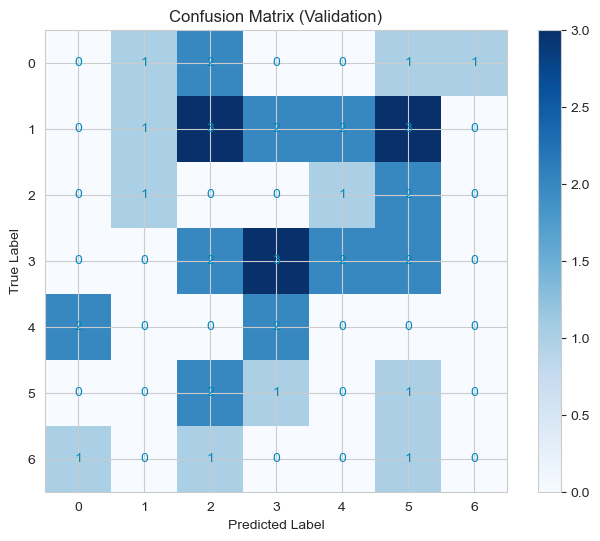

In [366]:
from sklearn.metrics import confusion_matrix

# 预测验证集
predictions_nn_valid = model.predict(X_valid_scaled)
predictions_nn_valid = np.argmax(predictions_nn_valid, axis=1)

# 计算混淆矩阵
confusion_valid = confusion_matrix(y_valid, predictions_nn_valid)

# 打印混淆矩阵
print('Confusion Matrix (Validation):')
print(confusion_valid)

# 绘制热力图，使用不同的颜色映射
plt.figure(figsize=(8, 6))
plt.imshow(confusion_valid, interpolation='nearest', cmap=plt.cm.Blues)  # 使用红色映射 (cmap=plt.cm.Reds)
plt.title('Confusion Matrix (Validation)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 在热力图上添加数值
for i in range(confusion_valid.shape[0]):
    for j in range(confusion_valid.shape[1]):
        plt.text(j, i, str(confusion_valid[i, j]), horizontalalignment='center', verticalalignment='center', color='#0089BA')

plt.savefig('./figs/Q3/3a_hunxiao.png',dmi=400)
plt.show()


In [370]:
import numpy as np

# 从混淆矩阵中提取真正例、真负例、假正例和假负例
TN = confusion_valid[0, 0]
FP = confusion_valid[0, 1:].sum()
FN = confusion_valid[1:, 0].sum()
TP = confusion_valid[1:, 1:].sum()

# 计算准确率
accuracy = (TP + TN) / (TP + TN + FP + FN)

# 计算召回率
recall = TP / (TP + FN)

# 计算精确度
precision = TP / (TP + FP)

print(f"准确率: {accuracy:.2f}")
print(f"召回率: {recall:.2f}")
print(f"精确度: {precision:.2f}")


准确率: 0.80
召回率: 0.91
精确度: 0.86


In [371]:
# 假设你有新的原始数据，存储在变量 new_data 中


# 如果有独热编码的需求，也要对 new_data 进行相同的处理

# 使用模型进行预测，得到每个样本的类别标签
new_predictions = model.predict(X_scaled)
new_predictions_nn = np.argmax(new_predictions, axis=1)


4/4 [==============================] - 0s 1ms/step


In [372]:
MLP_result = pd.DataFrame(new_predictions_nn)
new_predictions_nn

array([3, 0, 5, 4, 3, 3, 5, 3, 3, 2, 5, 2, 1, 1, 2, 2, 4, 0, 4, 2, 3, 2,
       3, 1, 2, 3, 2, 4, 0, 5, 3, 6, 5, 0, 5, 3, 2, 0, 3, 2, 4, 0, 5, 3,
       5, 5, 1, 3, 1, 1, 3, 3, 2, 2, 4, 2, 3, 5, 0, 4, 4, 2, 2, 3, 4, 0,
       1, 1, 6, 5, 2, 2, 3, 5, 4, 5, 5, 2, 3, 1, 5, 2, 5, 5, 2, 1, 2, 2,
       4, 5, 5, 5, 2, 2, 4, 4, 4, 5, 5, 2], dtype=int64)

,年龄,糖尿病史,冠心病史,吸烟史,饮酒史,HM_volume,ED_volume,ED_PCA_R_Ratio,original_shape_Maximum2DDiameterColumn,original_shape_MeshVolume,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,NCCT_original_firstorder_Entropy,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_Uniformity
0,43,0,0,0,0,69714,48919,0.136511,60.166436,20147.041667,14697.673767,0.729520,20386,2.851230,15.270048,90.266689,0.167037
1,58,0,0,0,0,47500,23526,0.246876,53.235327,9124.083333,6820.678698,0.747547,9327,3.033970,5.032169,64.718583,0.144498
2,78,0,0,0,0,86396,32621,0.075013,66.128662,14942.916667,13408.577859,0.897320,15349,2.965654,-0.889291,81.463013,0.149395
3,70,0,0,0,0,45498,22191,0.012483,45.122057,6855.291667,6167.205537,0.899627,7101,3.077057,-24.191618,93.803706,0.143088
4,51,0,0,0,0,14832,47392,0.011690,85.005882,8818.041667,9147.937102,1.037411,9157,3.205734,-9.291576,99.679391,0.128094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,87,0,1,0,0,32559,8968,0.000000,36.796739,4212.708333,4450.571539,1.056463,4377,3.091931,-6.107760,90.696547,0.137482
124,52,0,0,1,0,18150,409,0.000000,47.169906,865.291667,1412.641547,1.632561,969,3.447982,23.740156,37.254904,0.108789
125,57,0,0,0,0,27969,17948,0.160686,51.429563,7529.750000,6098.750651,0.809954,7695,2.952088,8.977008,84.064537,0.153007
126,47,0,0,1,1,53154,14430,0.000000,64.498062,7088.500000,6666.639721,0.940487,7340,2.984868,-14.911352,99.858712,0.151449
